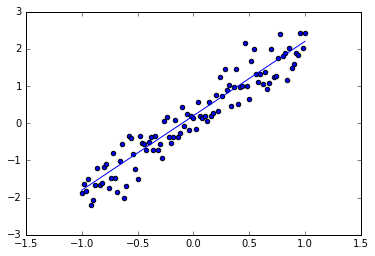

In [1]:
#Indicate the matplotlib to show the graphics inline
%matplotlib inline 
import matplotlib.pyplot as plt # import matplotlib
import numpy as np # import numpy
import tensorflow as tf
import numpy as np

trX = np.linspace(-1, 1, 101) #Create a linear space of 101 points between 1 and 1
trY = 2 * trX + np.random.randn(*trX.shape) * 0.4 + 0.2 #Create The y function based on the x axis
plt.figure() # Create a new figure
plt.scatter(trX,trY) #Plot a scatter draw of the random datapoints
plt.plot (trX, .2 + 2 * trX) # Draw one line with the line function

In [2]:
%matplotlib inline

In [4]:
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.4 + 0.2 # create a y value which is approximately linear but with some random noise

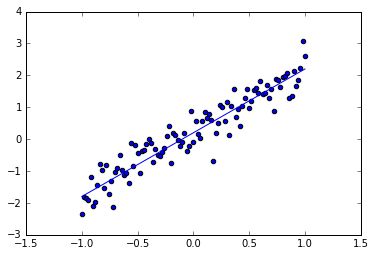

In [5]:
plt.scatter(trX,trY)
plt.plot (trX, .2 + 2 * trX)

In [6]:
X = tf.placeholder("float", name="X") # create symbolic variables
Y = tf.placeholder("float", name = "Y")

In [7]:
with tf.name_scope("Model"):

    def model(X, w, b):
        return tf.mul(X, w) + b # We just define the line as X*w + b0  

    w = tf.Variable(-1.0, name="b0") # create a shared variable
    b = tf.Variable(-2.0, name="b1") # create a shared variable
    y_model = model(X, w, b)

In [8]:
with tf.name_scope("CostFunction"):
    cost = (tf.pow(Y-y_model, 2)) # use sqr error for cost function

In [9]:
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

In [10]:
sess = tf.Session()
init = tf.initialize_all_variables()
tf.train.write_graph(sess.graph, '/home/ubuntu/linear','graph.pbtxt')
cost_op = tf.scalar_summary("loss", cost)
merged = tf.merge_all_summaries()
sess.run(init)
writer = tf.train.SummaryWriter('/home/ubuntu/linear', sess.graph)

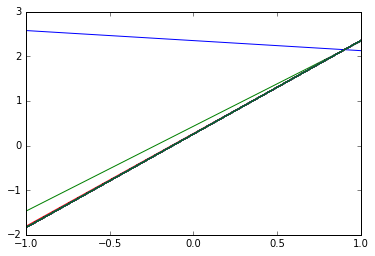

In [11]:
for i in range(100):
    for (x, y) in zip(trX, trY): 
        sess.run(train_op, feed_dict={X: x, Y: y})    
        summary_str = sess.run(cost_op, feed_dict={X: x, Y: y})
        writer.add_summary(summary_str, i)       
    b0temp=b.eval(session=sess)
    b1temp=w.eval(session=sess)
    plt.plot (trX, b0temp + b1temp * trX )

In [12]:
print  sess.run(w) # Should be around 2 
print sess.run(b) #Should be around 0.2

2.09422
0.256044


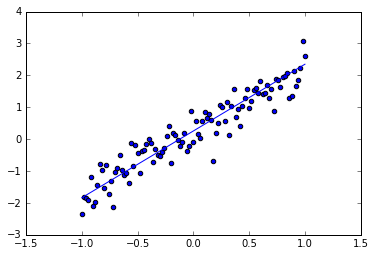

In [16]:
plt.scatter(trX,trY)
plt.plot (trX, sess.run(b) + trX * sess.run(w))